## Обучение целевой модели

Целевая модель - это модель, в которую мы загружаем аннотированный датасет и которая готова к развертыванию. Целевые модели обычно небольшие, быстрые и настроенные под конкретную задачу. Например, такой моделью является YOLOv8, которая используется в этом блокноте.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

Z:\dev\ITT_practicum\data_processing


In [2]:
DATA_YAML_PATH = f"{HOME}/dataset/data.yaml"

In [3]:
%cd {HOME}

from autodistill_yolov8 import YOLOv8

target_model = YOLOv8("yolov8n.pt")
target_model.train(DATA_YAML_PATH, epochs=50)

Z:\dev\ITT_practicum\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Z:\dev\ITT_practicum\data_processing


WARNING  Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at 'C:\Users\y2kbimbo\AppData\Roaming\Ultralytics\settings.yaml'
100%|██████████| 6.23M/6.23M [00:00<00:00, 9.10MB/s]


*******************************************
<_io.BufferedReader name='yolov8n.pt'>
*******************************************


New https://pypi.org/project/ultralytics/8.2.51 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81  Python-3.11.9 torch-2.3.1+cu118 CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Z:\dev\ITT_practicum\data_processing/dataset/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\last.pt'>
*******************************************
*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************
*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************


Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]
                   all         16         22      0.607        0.5      0.478      0.362
Speed: 0.9ms preprocess, 60.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to Z:\dev\ITT_practicum\runs\detect\train


*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************


## Валидация результатов

**ВАЖНО:** YOLOv8 позволяет посмотреть на результаты обучения в виде матрицы, графиков и изображений.

Z:\dev\ITT_practicum\data_processing


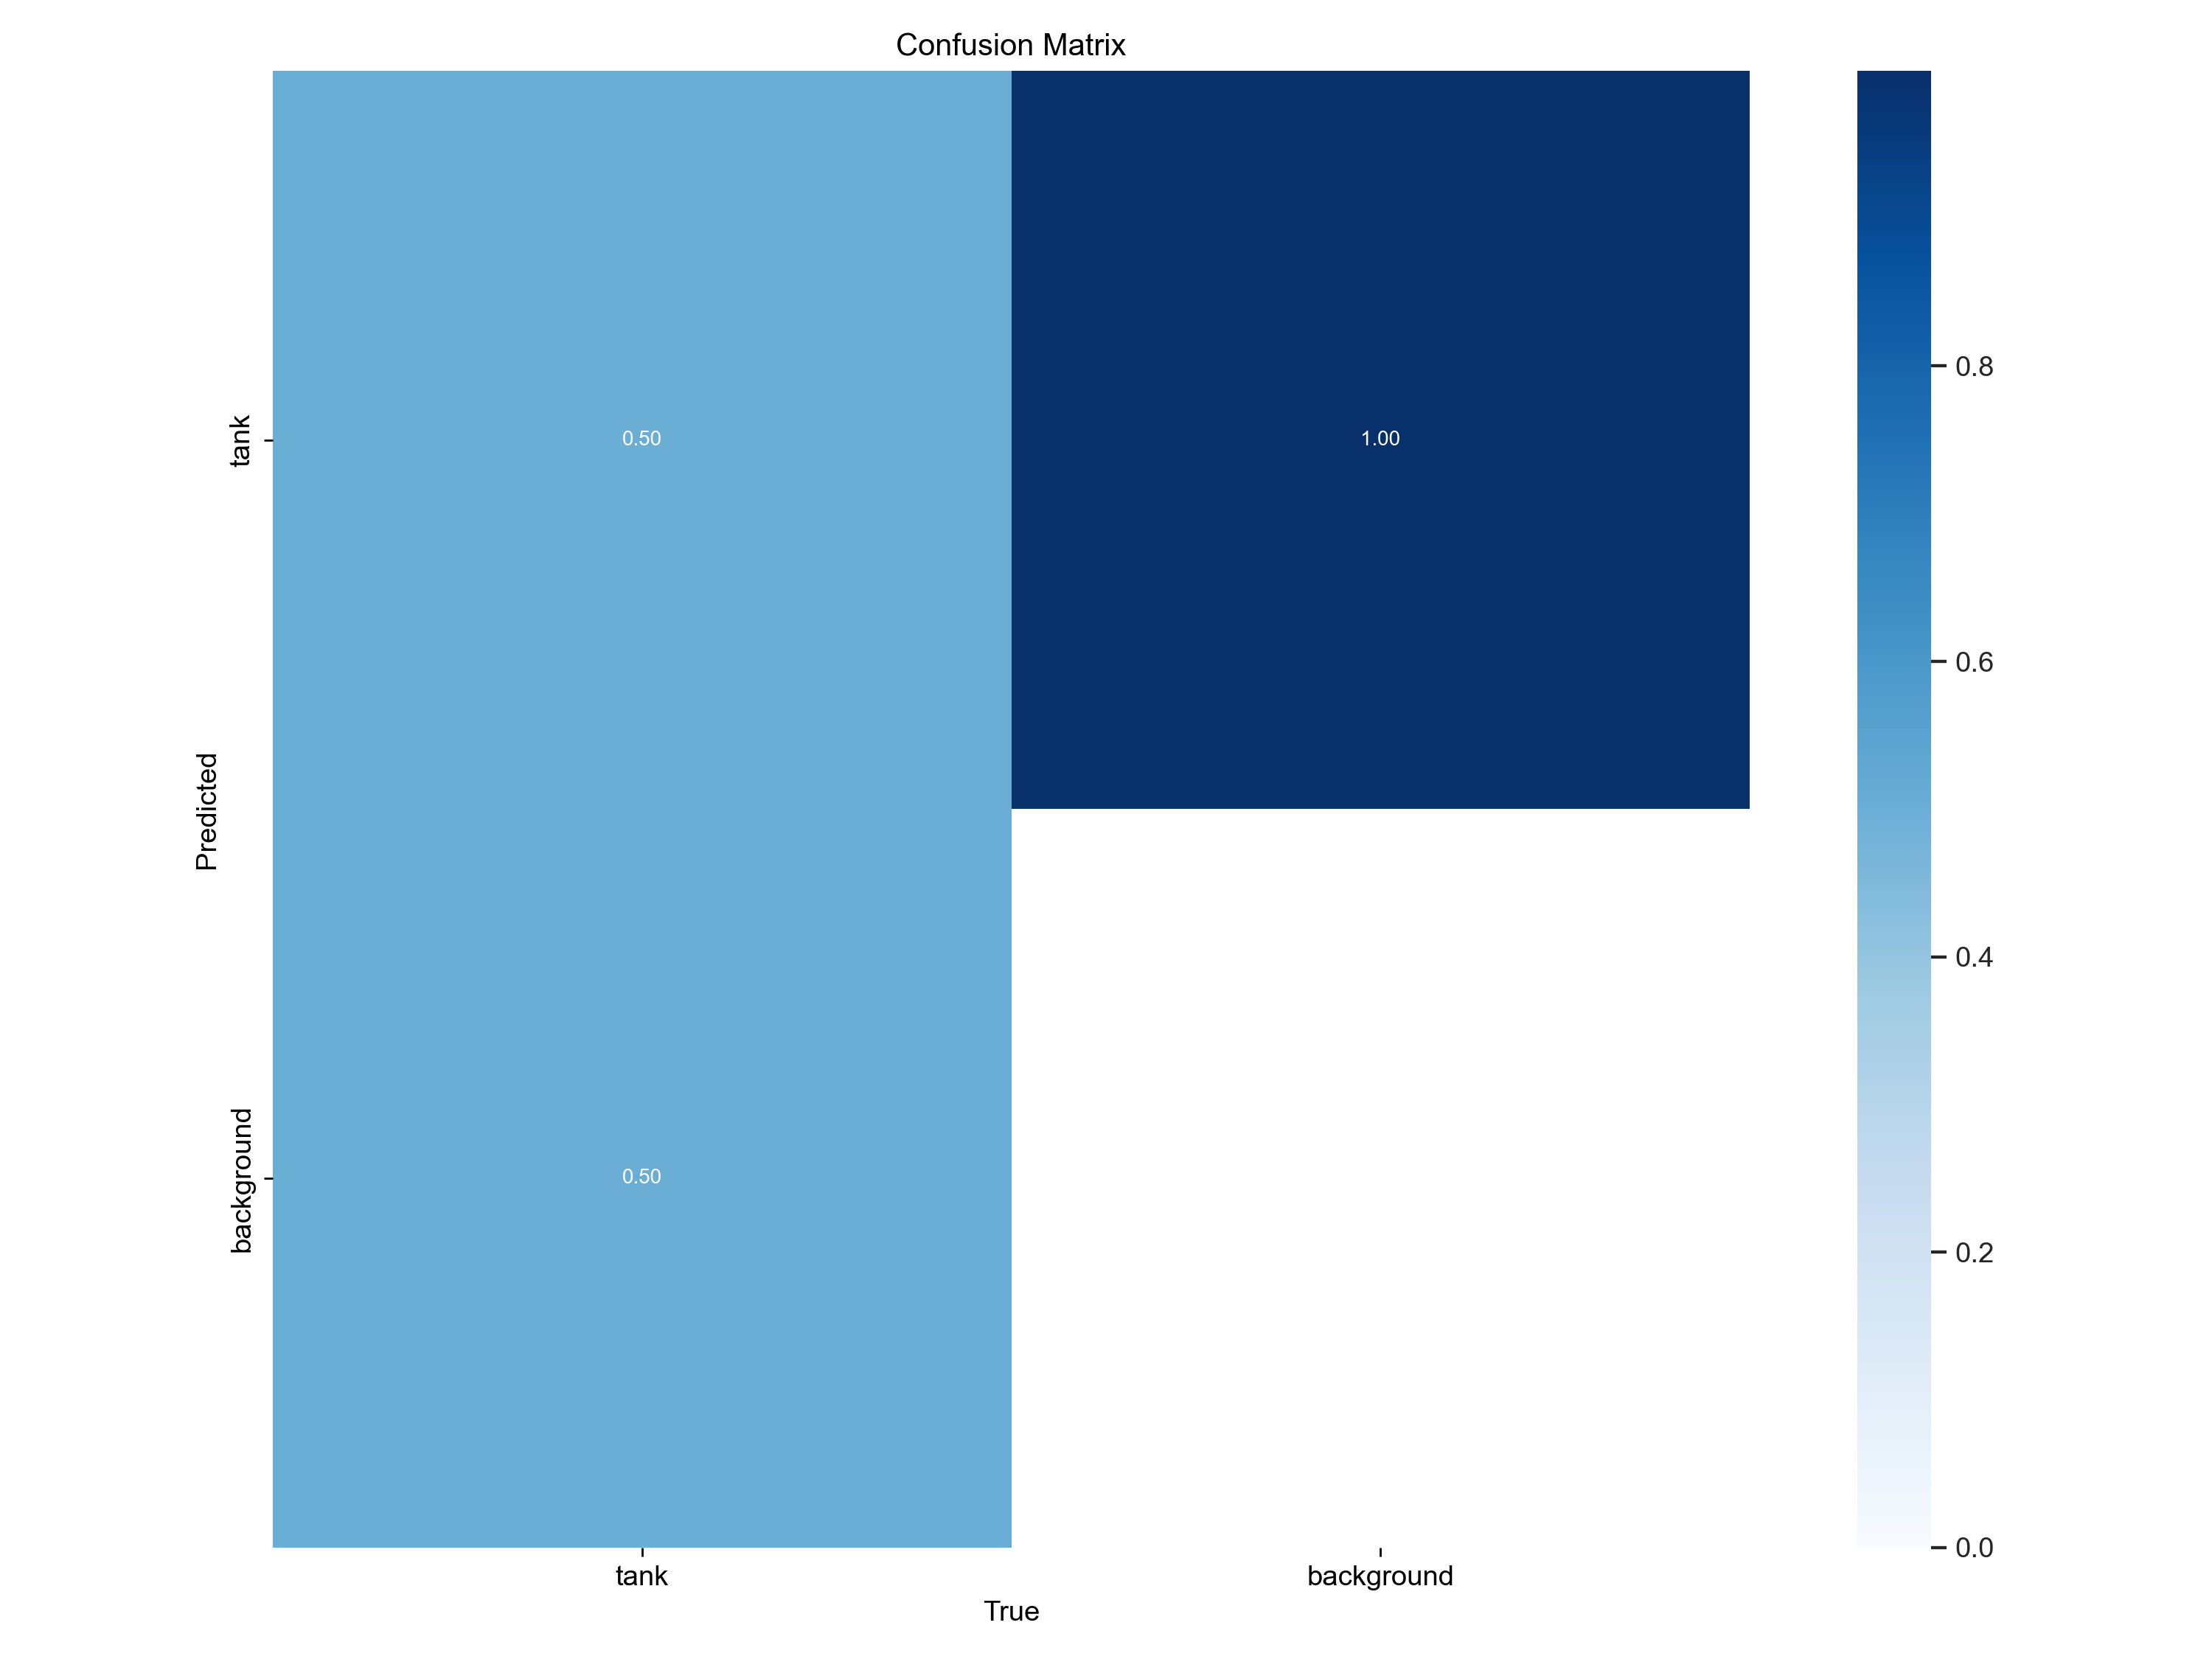

In [10]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/confusion_matrix.png', width=600)

Z:\dev\ITT_practicum\data_processing


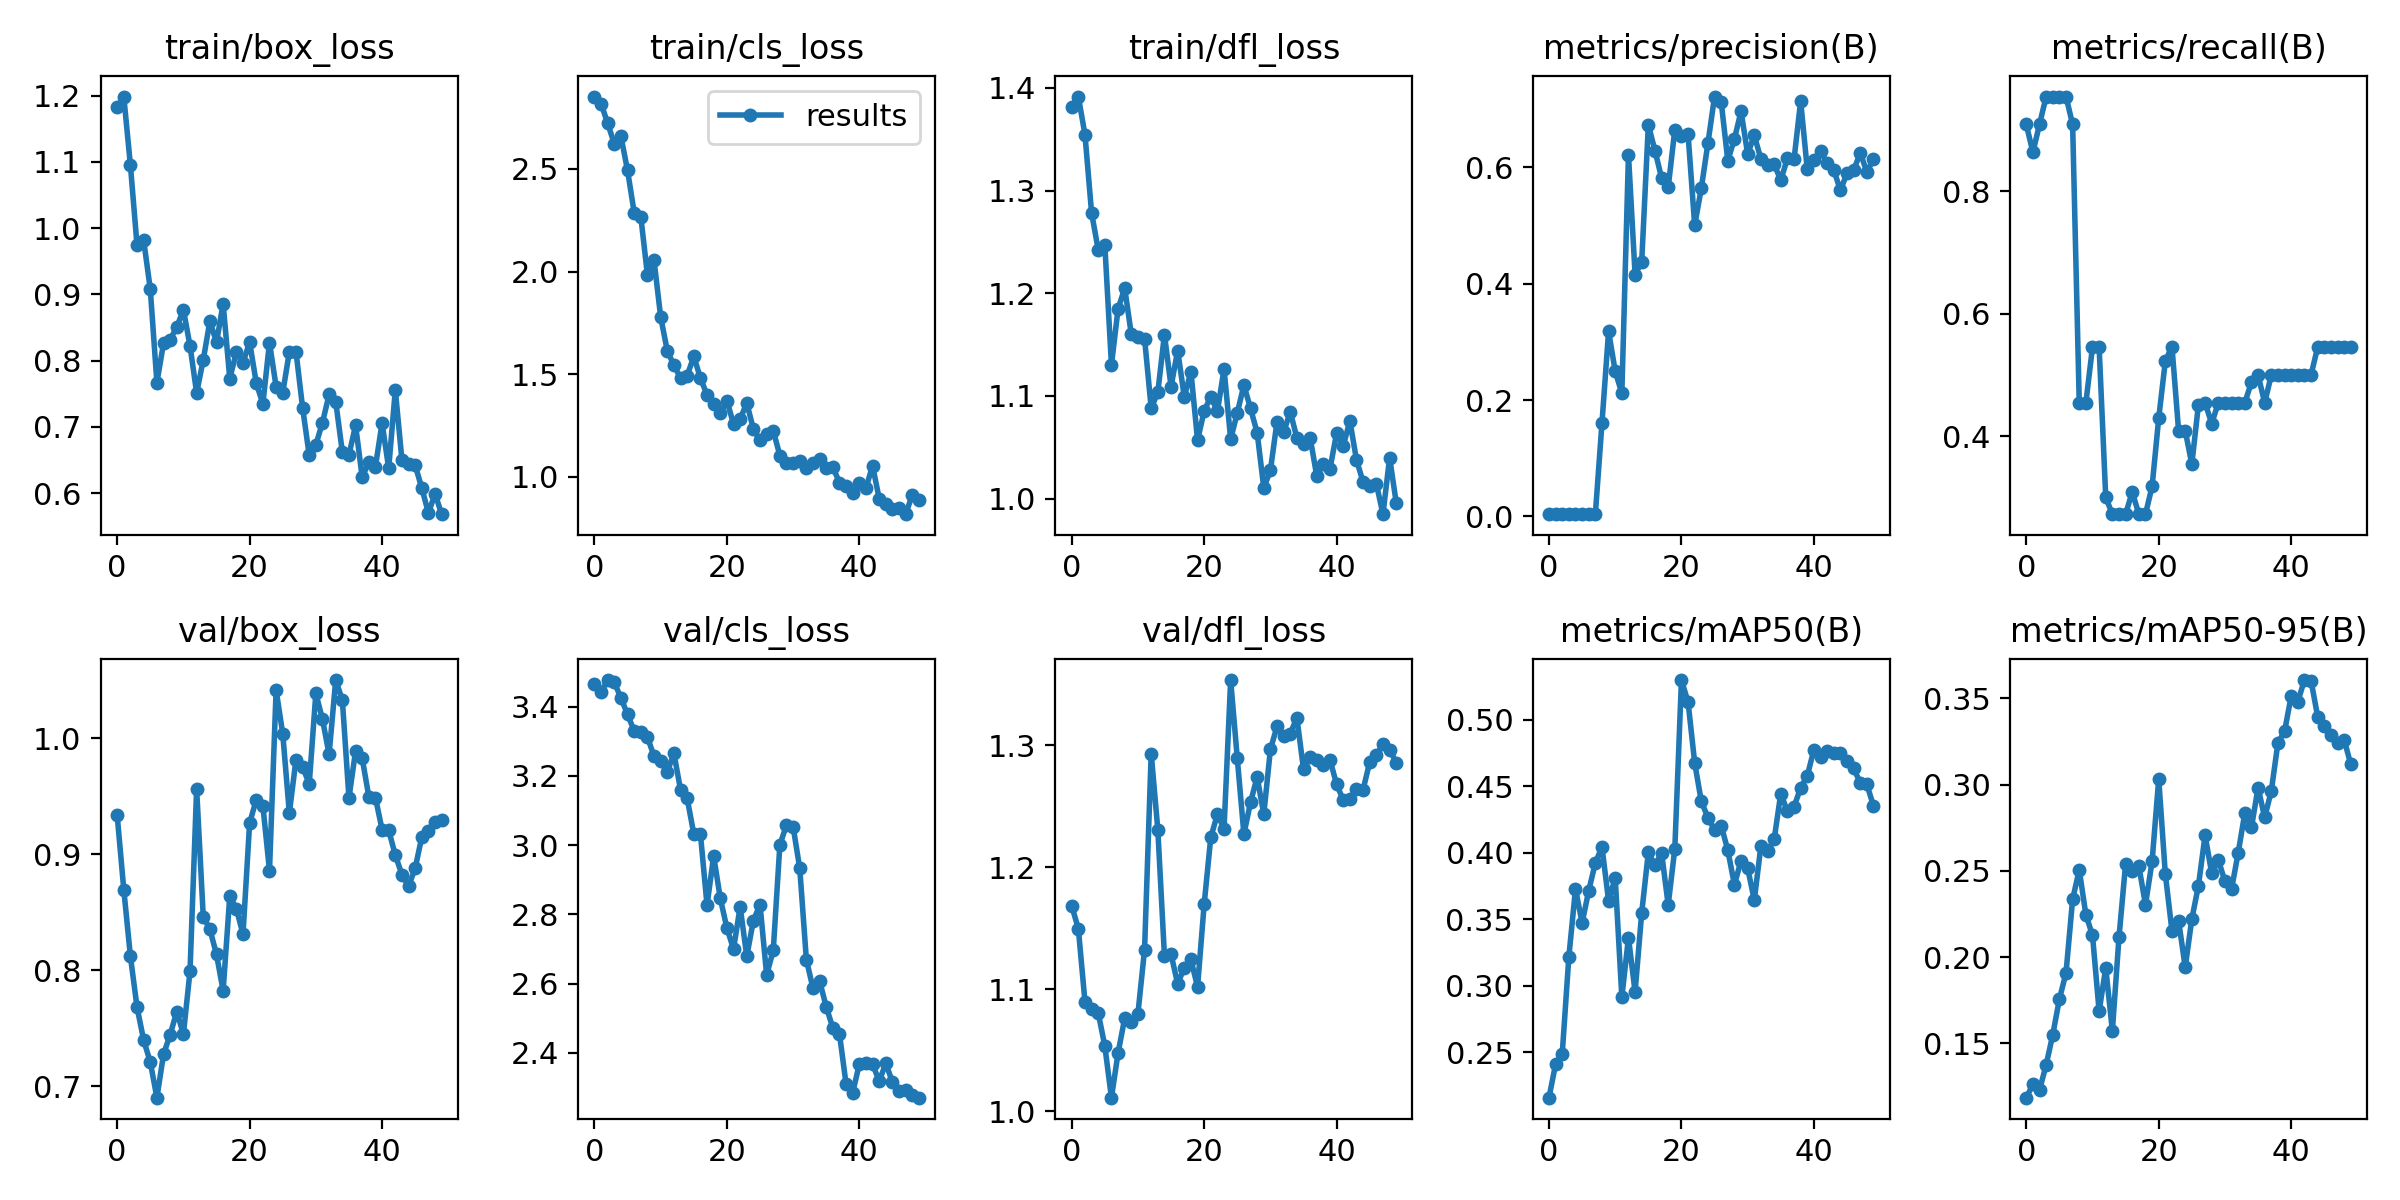

In [11]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/results.png', width=600)

Z:\dev\ITT_practicum\data_processing


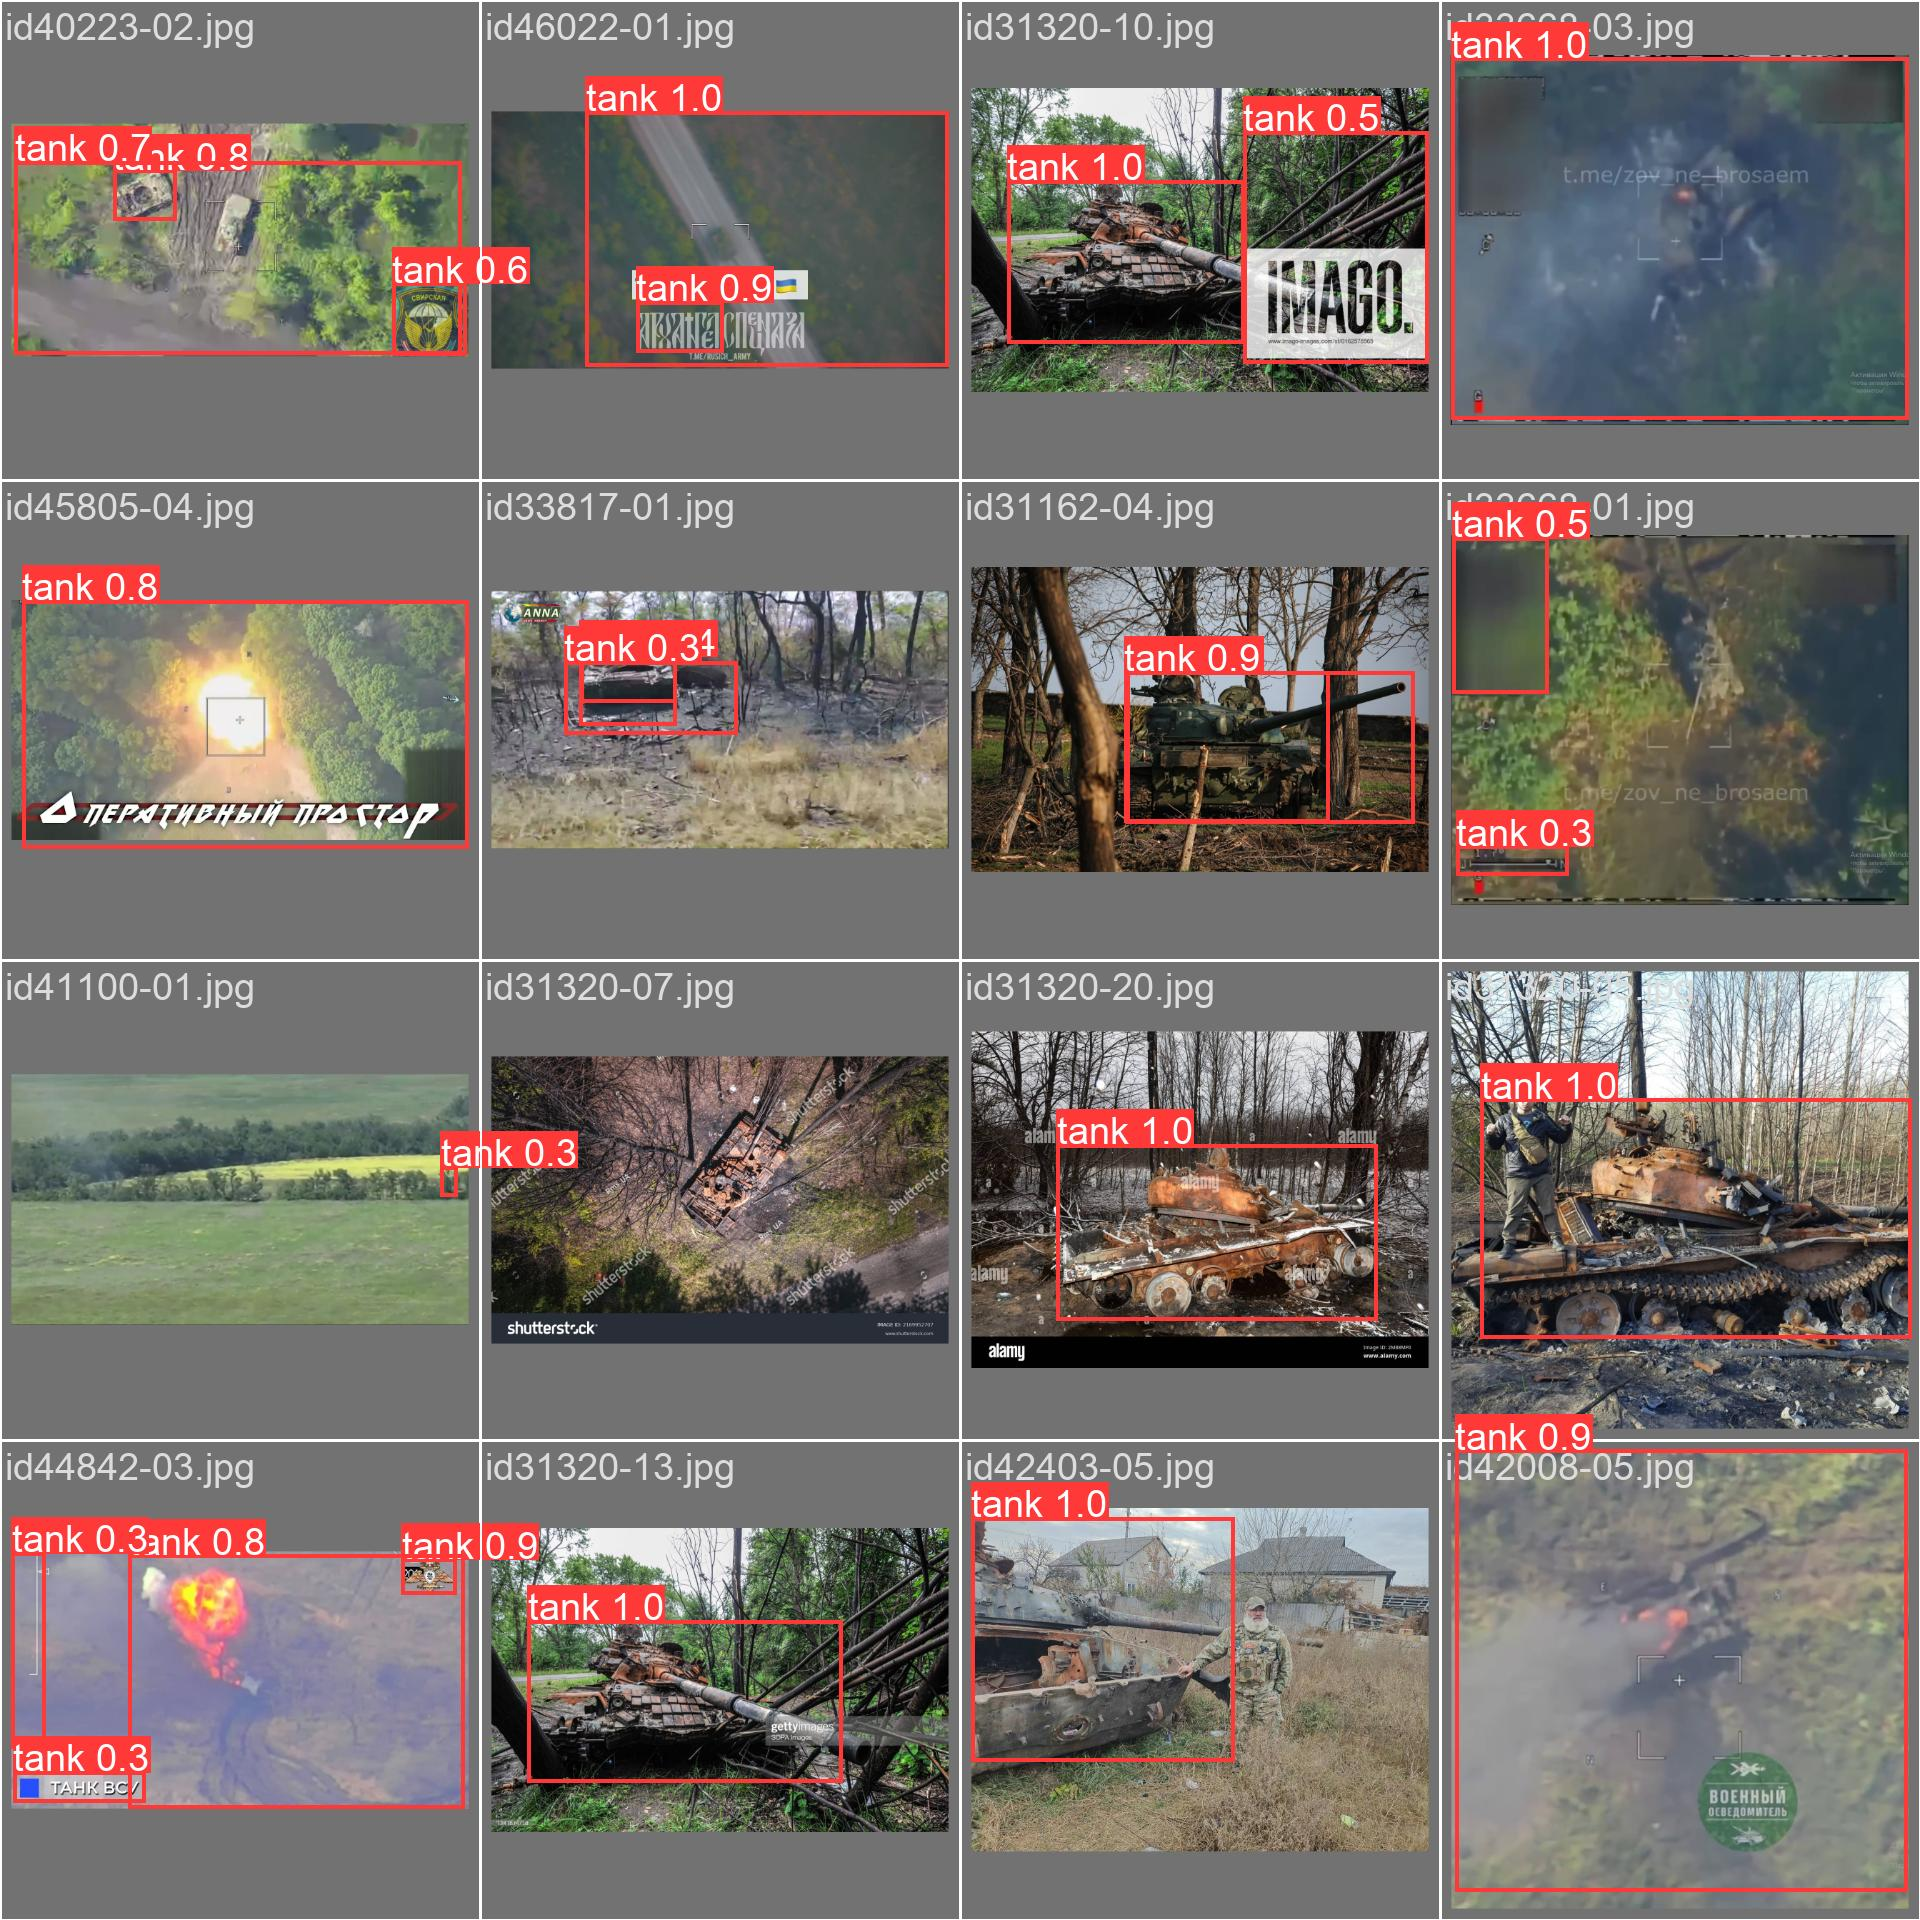

In [12]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/val_batch0_pred.jpg', width=600)

Как видно из результатов, модель отлично справляется с качественными изображениями танков, но находит странные корреляции на изображениях без явного присутствия танков.